In [1]:
from random import seed as random_seed
random_seed(50)
from numpy.random import seed as np_random_seed
np_random_seed(50)
from tensorflow import set_random_seed as tf_set_random_seed
tf_set_random_seed(50)

In [51]:
import os, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from skimage.transform import resize, rotate

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [57]:
def plot_learning_curve(history, loo_idx=None, save=False):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    if loo_idx is not None:
        plt.title('Training and validation accuracy'.format(loo_idx + 1))
    else:
        plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, '-', label='Training acc')
    if loo_idx is not None:
        plt.plot(epochs, val_acc, '.', label='Validation acc') # .은 point 
    else:
        plt.plot(epochs, val_acc, '-', label='Validation acc')
    plt.legend()

    plt.subplot(122)
    if loo_idx is not None:
        plt.title('Training and validation loss'.format(loo_idx + 1))
    else:
        plt.title('Training and validation loss')
    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, '-', label='Validation loss')
    plt.legend()
    
    if save:
        figure_path = os.path.join(save_path, 'figures')
        if not os.path.exists(figure_path):
            os.makedirs(figure_path)
        
        if loo_idx is not None:
            plt.savefig(os.path.join(figure_path,
                                     'training_validation_learning_curve_loocv_{}.png'.format(loo_idx+1)))
        else:
            plt.savefig(os.path.join(figure_path, 'training_validation_learning_curve.png'))

    plt.show()

In [7]:
def load_data(path,labels):
    images=[]
    cnt=0
    label = []
    for i,x in enumerate(labels):
        c_path = path+x+'/'
        files = glob.glob(c_path+'*')
        files.sort()
        # Read all images
        for y in files:
            tmp = cv2.imread(y)
            tmp = cv2.resize(tmp,(256,256),interpolation=cv2.INTER_CUBIC)
            tmp = cv2.cvtColor(tmp,cv2.COLOR_BGR2GRAY)
            images.append(tmp)
            if i==0:
                label.append(0)
            else:
                label.append(1)
            
            cnt+=1
            if cnt%100==0:
                print(str(cnt)+' set finish!!')
    print('All of dataset are loaded!')    
    print('==========================================')
    
    images = np.asarray(np.reshape(images,(len(images),256,256,1)))
    
    return images, label

In [23]:
def rotate_img(labeled,count,min_rads,max_rads):
    ratated_label = []
    icnt=1
    
    for j in range(count):
        random_rads = [random.uniform(min_rads, max_rads) for zz in range(len(labeled))]
        for i in range(len(labeled)):
            labeled_rot = rotate(labeled[i], random_rads[i])
            ratated_label.append(labeled_rot)
            
            if icnt%100==0:
                print(str(icnt)+' set rotated!')
            icnt+=1
        
    print('Done!==================================================')
    ratated_label = np.asarray(ratated_label)

    return ratated_label

In [5]:
label_list = ['class0']#
#X_area = (0,0,1400,1400)
X_0,y_0 = load_data('/data1/3rdDental/Labeled_Cropped_Data/PNG/',label_list)


All of dataset are loaded!


In [8]:
label_list = ['class1','class2','class3']
X_1,y_1 = load_data('/data1/3rdDental/Labeled_Cropped_Data/PNG/',label_list)

100 set finish!!
200 set finish!!
300 set finish!!
400 set finish!!
All of dataset are loaded!


In [19]:
X_1.shape

(404, 256, 256, 1)

In [10]:
y_0 = np.array(y_0)
y_1 = np.array(y_1)

In [30]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X_0, y_0, test_size=0.07,random_state=1,shuffle=True)
X0_train, X0_val, y0_train, y0_val = train_test_split(X0_train, y0_train, test_size=0.07,random_state=1,shuffle=True)

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.07,random_state=1,shuffle=True)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.07,random_state=1,shuffle=True)

In [32]:
X1_train.shape

(348, 256, 256, 1)

In [33]:
X0_train.shape

(43, 256, 256, 1)

In [34]:
X0_train = rotate_img(X0_train,20,-20,20)
X1_train = rotate_img(X1_train,2,-20,20)

100 set rotated!
200 set rotated!
300 set rotated!
400 set rotated!
500 set rotated!
600 set rotated!
700 set rotated!
800 set rotated!
Done!==================================================
100 set rotated!
200 set rotated!
300 set rotated!
400 set rotated!
500 set rotated!
600 set rotated!
Done!==================================================


In [37]:
y0_train = np.repeat(y0_train,20)
y1_train = np.repeat(y1_train,2)

In [40]:
X_train = np.concatenate((X0_train,X1_train))
y_train = np.concatenate((y0_train,y1_train))
X_val = np.concatenate((X0_val,X1_val))
y_val = np.concatenate((y0_val,y1_val))
X_test = np.concatenate((X0_test,X1_test))
y_test = np.concatenate((y0_test,y1_test))

In [42]:
print('Training set : ',X_train.shape)
print('Training label set : ',y_train.shape)
print('Validation set : ',X_val.shape)
print('Test set : ',X_test.shape)

Training set :  (1556, 256, 256, 1)
Training label set :  (1556,)
Validation set :  (31, 256, 256, 1)
Test set :  (33, 256, 256, 1)


In [43]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [44]:
print('Training set shape :   ', 'X', X_train.shape, '|', 'y', y_train.shape)
print('Validation set shape : ', 'X', X_val.shape, ' |', 'y', y_val.shape)
print('Test set shape :       ', 'X', X_test.shape, ' |', 'y', y_test.shape)

Training set shape :    X (1556, 256, 256, 1) | y (1556, 2)
Validation set shape :  X (31, 256, 256, 1)  | y (31, 2)
Test set shape :        X (33, 256, 256, 1)  | y (33, 2)


In [45]:
def CNN(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, 5, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    poo11 = MaxPooling2D(pool_size=(3, 3))(conv1)
    conv2 = Conv2D(64, 5, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(poo11)
    poo12 = MaxPooling2D(pool_size=(3, 3))(conv2)
    conv3 = Conv2D(128, 5, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(poo12)
    poo13 = MaxPooling2D(pool_size=(3, 3))(conv3)
    conv4 = Conv2D(256, 5, activation='relu', padding = 'same', kernel_initializer = 'he_normal')(poo13)
    poo14 = MaxPooling2D(pool_size=(3, 3))(conv4)
    
    flatten = Flatten()(poo14)
    
    dense1 = Dense(512, activation='relu')(flatten)
    dense2 = Dense(128, activation='relu')(dense1)
    dense3 = Dense(64, activation='relu')(dense2)
    dense4 = Dense(16, activation='relu')(dense3)
    
    outputs = Dense(2, activation='sigmoid')(dense4)
    
    
    model = Model(input=inputs, output=outputs)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [46]:
CNN_model = CNN()
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 128)         0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [47]:
num_batch = 16
num_epoch = 50

CNN_model = CNN()
CNN_histories = list()

CNN_history = CNN_model.fit(X_train, y_train,
                            validation_data=(X_val,y_val),
                            batch_size=num_batch,
                            epochs=num_epoch,
                            shuffle=True)

CNN_histories.append(CNN_history)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Train on 1556 samples, validate on 31 samples
Epoch 1/50
1556/1556 [==============================] - 5s 3ms/step - loss: 0.7426 - acc: 0.5376 - val_loss: 12.0306 - val_acc: 0.1290
Epoch 2/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.6853 - acc: 0.5823 - val_loss: 1.5226 - val_acc: 0.9032
Epoch 3/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.4631 - acc: 0.8011 - val_loss: 0.8134 - val_acc: 0.9355
Epoch 4/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.2607 - acc: 0.9087 - val_loss: 1.5513 - val_acc: 0.9032
Epoch 5/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.1928 - acc: 0.9364 - val_loss: 0.5171 - val_acc: 0.9677
Epoch 6/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.1827 - acc: 0.9557 - val_loss: 3.6197 - val_acc: 0.7742
Epoch 7/50
1556/1556 [==============================] - 3s 2ms/step - loss: 0.0945 - acc: 0.9682 - val_loss: 0.5171 - val_acc: 0.9677
Epoch 8/50
1556

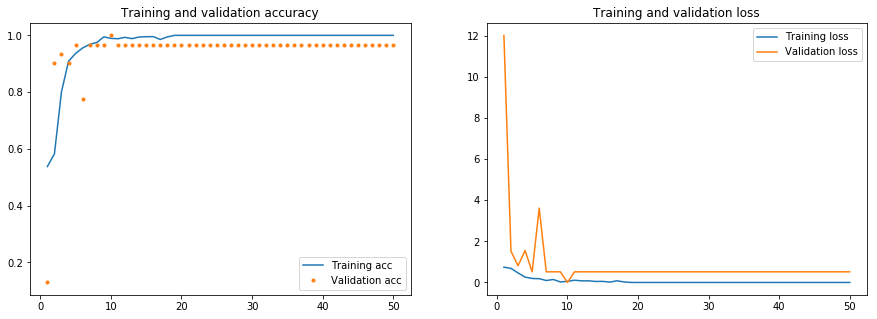

In [58]:
for history_idx, history in enumerate(CNN_histories):
    plot_learning_curve(history, loo_idx=history_idx, save=False)

In [50]:
pred = CNN_model.predict(X_test)

In [67]:
y_label = np.argmax(y_test,1)
y_fit = np.argmax(pred,1)

confusion_mat = confusion_matrix(y_label, y_fit)
confusion_mat

array([[ 3,  1],
       [ 1, 28]])

In [71]:
y_label

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
y_fit

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support as score

In [75]:
accuracy = accuracy_score(y_label,y_fit)
precision, recall, fscore, support = score(y_label, y_fit)

print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.9393939393939394
precision: [ 0.75        0.96551724]
recall: [ 0.75        0.96551724]
fscore: [ 0.75        0.96551724]
support: [ 4 29]
